#### Gold Prices

In [144]:
import pandas as pd
import seaborn as sb
import numpy as np
import missingno as msno
import autoreload
import matplotlib.pyplot as plt
import csv
import os
import sys

from collections import defaultdict, Counter

sb.set_style("darkgrid")
sb.set(font_scale=1.2)

pd.set_option("display.max_columns", 100)
pd.set_option("display.max_row", 1000)

%matplotlib inline
%reload_ext autoreload
%autoreload 2

plt.figure(figsize = (10, 6))

<Figure size 720x432 with 0 Axes>

<Figure size 720x432 with 0 Axes>

In [145]:
dParser = lambda x: pd.datetime.strptime(x, "%Y-%m")
df = pd.read_csv("D:\Open Classroom\Datasets\Gold Prices\monthly_csv.csv", parse_dates=["Date"], date_parser=dParser)
df.head()

<ipython-input-145-5582de46b2c1>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dParser = lambda x: pd.datetime.strptime(x, "%Y-%m")


,Date,Price
0,1950-01-01,34.73
1,1950-02-01,34.73
2,1950-03-01,34.73
3,1950-04-01,34.73
4,1950-05-01,34.73


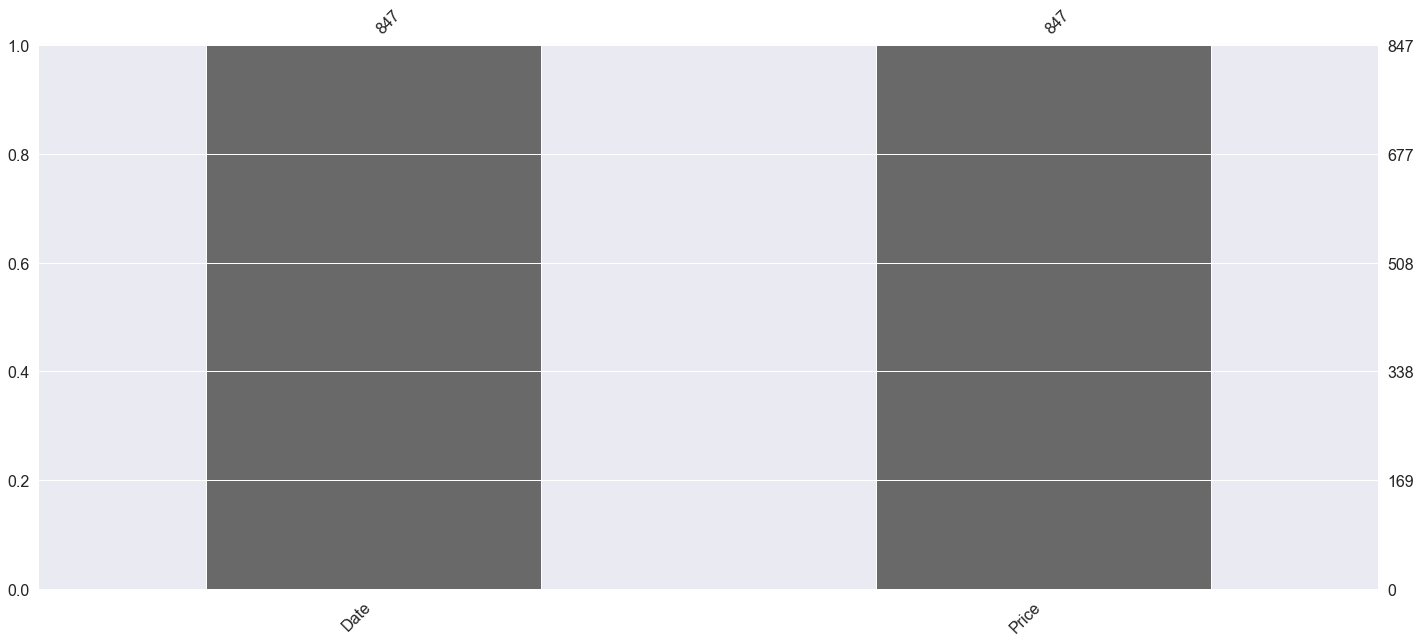

In [146]:
msno.bar(df)

In [147]:
df["day"] = df["Date"].dt.day_name()
df.head()

,Date,Price,day
0,1950-01-01,34.73,Sunday
1,1950-02-01,34.73,Wednesday
2,1950-03-01,34.73,Wednesday
3,1950-04-01,34.73,Saturday
4,1950-05-01,34.73,Monday


In [148]:
round(df.describe(), 2)

,Price
count,847.00
mean,416.56
std,453.67
min,34.49
25%,35.19
50%,319.62
75%,447.03
max,1840.81


In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    847 non-null    datetime64[ns]
 1   Price   847 non-null    float64       
 2   day     847 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 20.0+ KB


In [150]:
df.set_index(df["Date"], inplace = True)
df.drop(columns = ["Date"], inplace = True)
df.head()

,Price,day
Date,,
1950-01-01,34.73,Sunday
1950-02-01,34.73,Wednesday
1950-03-01,34.73,Wednesday
1950-04-01,34.73,Saturday
1950-05-01,34.73,Monday


In [151]:
print("Max : ", df.index.max(), "\nMin : ", df.index.min())
print("Time Diff : ", (df.index.max() - df.index.min())/366)

Max :  2020-07-01 00:00:00 
Min :  1950-01-01 00:00:00
Time Diff :  70 days 08:27:32.459016


Text(0, 0.5, 'Gold Price')

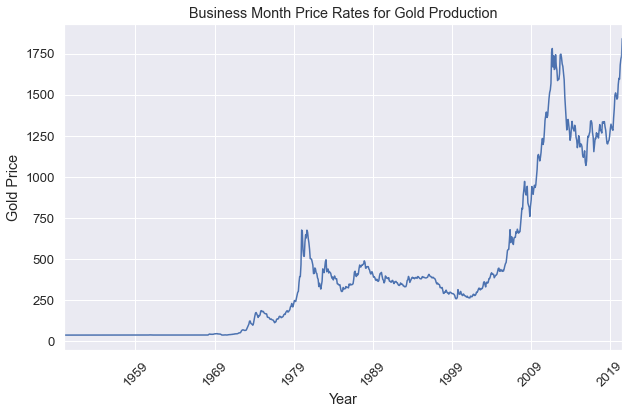

In [152]:
plt.figure(figsize = (10, 6))
max_day = df["Price"].resample("bm").sum()
max_day.plot()
plt.title("Business Month Price Rates for Gold Production")
plt.xticks(rotation = 45)
plt.xlabel("Year")
plt.ylabel("Gold Price")
#sb.lineplot(max_day.index, y = max_day.values(), data = max_day)

(array([1000., 1200., 1400., 1600., 1800., 2000.]),
 <a list of 6 Text major ticklabel objects>)

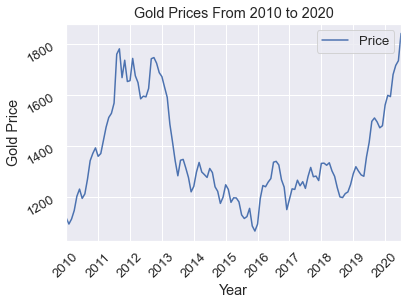

In [161]:
two_thousands = df.index > pd.to_datetime("2009-12-01")
df[two_thousands].plot()
plt.title("Gold Prices From 2010 to 2020")
plt.xticks(rotation = 45)
plt.xlabel("Year")
plt.ylabel("Gold Price")
plt.yticks(rotation = 30)

In [154]:
dParser = lambda x: pd.datetime.strptime(x, "%Y-%m")
annual_prices = pd.read_csv(r"D:\Open Classroom\Datasets\Gold Prices\annual_csv.csv", parse_dates=["Date"], date_parser=dParser)
annual_prices.head()

<ipython-input-154-2450eb5bb17b>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dParser = lambda x: pd.datetime.strptime(x, "%Y-%m")


,Date,Price
0,1950-12-01,34.72
1,1951-12-01,34.66
2,1952-12-01,34.79
3,1953-12-01,34.85
4,1954-12-01,35.04


In [155]:
annual_prices.isnull().sum()

Date     0
Price    0
dtype: int64

In [156]:
annual_prices.set_index(annual_prices["Date"], inplace = True)
annual_prices.drop(columns = ["Date"], inplace = True)
annual_prices.head()

,Price
Date,
1950-12-01,34.72
1951-12-01,34.66
1952-12-01,34.79
1953-12-01,34.85
1954-12-01,35.04


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 <a list of 10 Text major ticklabel objects>)

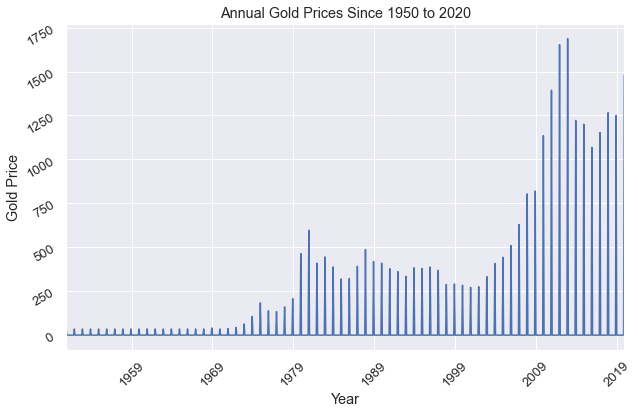

In [157]:
plt.figure(figsize = (10, 6))
annual_data = annual_prices["Price"].resample("bm").sum()
annual_data.plot()
#plt.figure(figsize = (10, 6))
plt.title("Annual Gold Prices Since 1950 to 2020")
plt.xticks(rotation = 45)
plt.xlabel("Year")
plt.ylabel("Gold Price")
plt.yticks(rotation = 30)